# **Amazon Data Science Books Dataset**

Link github: https://github.com/nguynking/amazon-books

# Load dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [ ]:
# Load the dataset
# Assuming 'df' is the DataFrame containing the dataset
df = pd.read_csv("https://raw.githubusercontent.com/nguynking/amazon-books/main/dataset/final_book_dataset_kaggle2.csv")
df.shape

(830, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         722 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         745 non-null    object 
 5   avg_reviews                   702 non-null    float64
 6   n_reviews                     702 non-null    object 
 7   star5                         702 non-null    object 
 8   star4                         635 non-null    object 
 9   star3                         554 non-null    object 
 10  star2                         451 non-null    object 
 11  star1                         328 non-null    object 
 12  dimensions                    644 non-null    object 
 13  weigh

# **Chương 3:**

## 1. Kiểm tra tình trạng bộ dữ liệu gốc

Bộ dữ liệu Amazon Data Science Books Dataset được thu thập cần phải kiểm tra các yếu tố về tình trạng đầu vào để làm sạch dữ liệu (Data cleaning/cleansing), loại bỏ nhiễu (remove noise) cũng như hiệu chỉnh những phần dữ liệu không nhất quán (correct data inconsistencies).

In [ ]:
print('Chi tiết bộ data')
print(df.info())
print(f'Số lượng phần tử bộ dữ liệu: {df.size}')
print(f'Số dòng và cột của bộ dữ liệu - (dòng, cột): {df.shape}')

Chi tiết bộ data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         722 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         745 non-null    object 
 5   avg_reviews                   702 non-null    float64
 6   n_reviews                     702 non-null    object 
 7   star5                         702 non-null    object 
 8   star4                         635 non-null    object 
 9   star3                         554 non-null    object 
 10  star2                         451 non-null    object 
 11  star1                         328 non-null    object 
 12  dimensions                    644 non-null    o

Ta thấy bộ dữ liệu gồm 830 dòng và 19 cột. Với 2 kiểu dữ liệu chính là: Float (2 thuộc tính), Object (17 thuộc tính).


### 1.1. Kiểm tra dữ liệu lặp lại

In [ ]:
import pandas as pd
import numpy as np

# Check for duplicates
duplicates = df[df.duplicated()]
if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found. Rows to be removed:")
    print(duplicates)

No duplicates found.


### 1.2. Kiểm tra dữ liệu bị thiếu (missing values)

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values found.")
else:
    print("Missing values found. Columns with missing values:")
    print(missing_values[missing_values > 0])

Missing values found. Columns with missing values:
author                          173
price                           108
price (including used books)    108
pages                            85
avg_reviews                     128
n_reviews                       128
star5                           128
star4                           195
star3                           276
star2                           379
star1                           502
dimensions                      186
weight                          179
language                         71
publisher                       116
ISBN_13                         165
dtype: int64


### 1.3. Kiểm tra dữ liệu ngoại lệ (outliers)

In [ ]:
# Validate numeric columns for outliers
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    # Assuming a simple Z-score based outlier detection method
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    outliers = df[abs(z_scores) > 3][col]
    if outliers.empty:
        print(f"No outliers found in column '{col}'.")
    else:
        print(f"Outliers found in column '{col}':")
        print(outliers)

Outliers found in column 'price':
248     250.63
638     743.47
677     287.14
734    1318.74
Name: price, dtype: float64
Outliers found in column 'avg_reviews':
56     3.0
137    1.0
258    3.0
260    3.0
311    2.8
343    3.0
399    1.0
405    3.0
637    1.0
724    2.7
Name: avg_reviews, dtype: float64


### 1.4. Kiểm tra định dạng dữ liệu và tính nhất quán của dữ liệu

In [ ]:
# Check for data format and consistency (specific to columns)
# Validating ISBN-13 format
invalid_isbn = df[~df['ISBN_13'].astype(str).str.match(r'^\d{3}-\d{10}$')]
if invalid_isbn.empty:
    print("All ISBN-13 codes are in valid format.")
else:
    print("Invalid ISBN-13 format found:")
    print(list(invalid_isbn['ISBN_13'].unique()))

Invalid ISBN-13 format found:
[nan, 'Research in Drama Education', ' ', '$13.99 ', '-34%', '     ', 'Usually ships within 2 to 3 days.', '#NAME?', '#250 in ', '#1 in ', '  Second Edition, Second edition ', '$113.19 ', '-22%', 'The Data Revolution', 'Regulating Alcohol around the World: Policy Cocktails', '-19%', '#35 in ', 'x', '-27%', '79', '99', '-21%', '75', 'Pratip Samanta', '49', '69', '29', '66', '-30%', '  Kindle Edition ', '$139.99 ', '$13.79 ', 'Python', '#372 in ', 'PennyLane', 'JOSH TYSON', '—', '-39%', '59', '39', '-25%', '30', '56', '25']


In [ ]:
# Validate URLs in link columns
# Check for valid URL format in 'link' and 'complete_link'
link_columns = ['complete_link']
for col in link_columns:
    invalid_urls = df[~df[col].str.startswith('https://www.amazon.com')]
    if invalid_urls.empty:
        print(f"All URLs in column '{col}' are valid Amazon URLs.")
    else:
        print(f"Invalid URLs found in column '{col}':")
        print(invalid_urls[col])

All URLs in column 'complete_link' are valid Amazon URLs.


## 2. Tiền xử lý dữ liệu

### 2.1. Xử lý định dạng dữ liệu (Data format)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         722 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         745 non-null    object 
 5   avg_reviews                   702 non-null    float64
 6   n_reviews                     702 non-null    object 
 7   star5                         702 non-null    object 
 8   star4                         635 non-null    object 
 9   star3                         554 non-null    object 
 10  star2                         451 non-null    object 
 11  star1                         328 non-null    object 
 12  dimensions                    644 non-null    object 
 13  weigh

Biến định lượng: `price (float), pages (int), avg_reviews (float), n_reviews (int), star5 - star1 (float), weight (float)`

**Biến `weight`:** Đưa tất cả về ounces và chuyển thành kiểu `float`

In [ ]:
# 1. weight
import re
def preprocess_weight(weight):
    try:
        # Extract numeric values
        numeric_value = float(re.findall(r'^(.+) \w+', weight)[0])

        # Check for 'pounds' and convert to ounces
        if 'pounds' in weight:
            numeric_value *= 16.0  # 1 pound = 16 ounces

        return numeric_value
    except:
        return np.nan  # Return NaN for non-convertible values

processed_weight = [preprocess_weight(wei) for wei in df['weight']]
df['weight'] = processed_weight

# Display the processed weight column
print(df['weight'])

0      40.48
1      31.36
2      22.40
3      23.52
4      20.80
       ...  
825    15.50
826    36.00
827    17.60
828      NaN
829      NaN
Name: weight, Length: 830, dtype: float64


**Biến `star5 - star1`:** Chuyển giá trị trong các cột `star` từ phần trăm về dạng thập phân

In [ ]:
# 2. star5 - star1 (float)
star_columns = ['star5', 'star4', 'star3', 'star2', 'star1']
def preprocess_star(value):
    try:
        # Extract numeric values
        numeric_value = float(value) / 100.0
        return numeric_value
    except:
        return np.nan  # Return NaN for non-convertible values

for col in star_columns:
    df[col] = [preprocess_star(value) for value in df[col].str.replace(r'%', '')]

**Biến `n_reviews`:** Xóa dấu `,` trong cột `n_reviews` và chuyển về kiểu `int`

In [ ]:
# 3. n_reviews (int)
df['n_reviews'] = df['n_reviews'].str.replace(r',', '', regex=True).astype("Int64")

**Biến `pages`:** Xóa dấu `,` và chuyển về kiểu `int`

In [ ]:
# 4. pages (int)
df['pages'] = df['pages'].str.replace(r',', '', regex=True)

def preprocess_pages(value):
    try:
        # Extract numeric values
        numeric_value = float(value)
        return numeric_value
    except:
        return np.nan  # Return NaN for non-convertible values

df['pages'] = [preprocess_pages(value) for value in df['pages']]
df['pages'] = df['pages'].astype("Int64")

### **Biến định tính: `title, author, dimensions, language, publisher, ISBN_13, link, complete_link`**

**Split Multiple Authors:** If there are multiple authors separated by a comma, you can split them into separate strings or create a list of authors for each book.

**Remove Extra Characters:** Eliminate any additional characters such as brackets, quotes, or et al. (if they're not meaningful) to clean the author names.

**Handle Missing Values:** If there are NaN or empty values, you might choose to replace them with a default value or perform imputation.

**Normalize Names:** Ensure consistency in author names by standardizing them. For example, converting all names to title case.

**Create Binary Flags:** If needed, create binary flags indicating whether a book has multiple authors or not.

1. Biến `title`

In [ ]:
# 1. title
df['title'].isna().sum()

0

2. Biến `author`

In [ ]:
# 2. author
df['author'].unique()

array(['[ Dr Dhaval Maheta]', nan, '[ Oz du Soleil,  and , Bill Jelen]',
       '[ William McKinney]', '[ Paul McFedries]', '[ Cathy Tanimura]',
       '[ Matthew B. Miles, A. Michael Huberman, et al.]',
       '[ Gunnar Carlsson,  and , Mikael Vejdemo-Johansson]',
       '[ Robert I. Kabacoff]', '[ Chad Knowles]',
       '[ Programming Languages Academy, Matthew Kinsey, et al.]',
       '[ Ekaterina Kochmar]', '[ Walter Shields]',
       '[ Programming Languages Academy]',
       '[ Antoine Jacquier, Oleksiy Kondratyev, et al.]', '[ Dan Bader]',
       '[ Allen B. Downey]', '[ Jake VanderPlas]', '[ Nicolas Vandeput]',
       '[ Lee Vaughan]', '[ Luciano Ramalho]', '[ Leonard J. Ledger]',
       '[ Mike Cohen]', '[ Jonelle Hoop]', '[ DK]',
       '[ Charles R. Severance, Aimee Andrion, et al.]',
       '[ Donald P. Wilson]', '[ Yves Hilpisch]', '[ Yuli Vasiliev]',
       '[ Ronald T. Kneusel]', '[ Scott Mccoy]', '[ Patrick Viafore]',
       '[ JOE WEBINAR]', '[ Jules Damji, Brooke Weni

In [ ]:
# Preprocessing function to clean author names
def preprocess_authors(author):
    if pd.isnull(author):  # Handling NaN values
        return np.nan

    # Remove unwanted characters and split multiple authors
    author = re.sub(r'[\[\]]|et al.|\sand', '', author)
    cleaned_author = [name.strip().title() for name in re.split(r'\s*,+\s*', author) if name != '']

    # Normalize the names (optional)
    return cleaned_author  # Convert to title case

# Apply the preprocessing function to the author data
df['author'] = [preprocess_authors(a) for a in df['author']]

3. Biến `dimensions`

In [ ]:
# 3. dimensions
df['dimensions'].unique()

array(['8.5 x 1.01 x 11 inches', '8 x 0.98 x 9.25 inches',
       '8.25 x 0.6 x 10.75 inches', '7 x 1.11 x 9.19 inches',
       '7.38 x 0.83 x 9.25 inches', nan, '6.75 x 0.75 x 8.75 inches',
       '8.5 x 0.92 x 11 inches', '6.75 x 0.75 x 9.75 inches',
       '7.38 x 1.5 x 9.25 inches', '6 x 0.9 x 9 inches',
       '6 x 0.24 x 9 inches', '6 x 1.19 x 9 inches',
       '7.38 x 1.1 x 9.25 inches', '7.5 x 0.57 x 9.25 inches',
       '7.25 x 0.5 x 9 inches', '6 x 0.53 x 9 inches',
       '7.5 x 1 x 9.25 inches', '6 x 0.68 x 9 inches',
       '7 x 0.75 x 9 inches', '7.5 x 5.5 x 0.5 inches; 3.2 Ounces',
       '7 x 1.19 x 9.19 inches', '9.5 x 0.7 x 6.6 inches',
       '7 x 2 x 9.25 inches', '8.5 x 0.2 x 11 inches',
       '7 x 0.5 x 9.25 inches', '6 x 0.06 x 9 inches',
       '7.75 x 0.63 x 9.19 inches', '7.01 x 0.61 x 9.17 inches',
       '7 x 0.9 x 9.1 inches', '7 x 0.71 x 9.25 inches',
       '7.06 x 1.13 x 9.25 inches', '7.75 x 1.5 x 9.75 inches',
       '7 x 1 x 9 inches', '7 x 0.4 x 10 

In [ ]:
# Extract weight from the dimensions column and impute to the weight column
to_replace = df[df['dimensions'].str.contains(r'Pounds|Ounces', na=False)][['dimensions', 'weight']]
extract_weight = [preprocess_weight(wei) for wei in to_replace['dimensions'].str.extract(r';\s(.*)$')[0]]
df.loc[to_replace.index, 'weight'] = extract_weight

In [ ]:
# Delete weights from dimensions column
df.loc[:, 'dimensions'] = df['dimensions'].str.replace(r';.+$', '', regex=True)

4. Biến `language`

In [ ]:
language_repl = df[~df['language'].str.contains(r'English|Spanish|Japanese|French', na=True)]['language']
df.loc[language_repl.index, 'language'] = np.nan

In [ ]:
df[df['language'].str.contains(r'[()]', na=False)]

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
22,Monty Python and the Holy Grail (Special Edition),NaN,9.99,9.99,<NA>,4.7,10103,0.85,0.08,0.03,0.01,0.02,7.5 x 5.5 x 0.5 inches,3.2,"Unqualified, Japanese (Dolby Digital 2.0 Mono)...",NaN,NaN,/Monty-Python-Holy-Grail-Special/dp/B00005O3VC...,https://www.amazon.com/Monty-Python-Holy-Grail...
569,Monty Python's Life Of Brian [DVD],NaN,18.85,18.85,<NA>,4.8,3678,0.86,0.09,0.04,0.01,NaN,7.5 x 5.38 x 0.6 inches,4.0,English (Dolby Digital 2.0 Mono),NaN,NaN,/Monty-Pythons-Brian-Graham-Chapman/dp/6305388...,https://www.amazon.com/Monty-Pythons-Brian-Gra...
582,Monty Python's The Meaning of Life [Blu-ray],NaN,9.99,9.99,<NA>,4.7,3337,0.82,0.10,0.04,0.02,0.02,6.75 x 5.3 x 0.35 inches,2.4,"English (DTS-HD Master Audio 5.1), French (DTS...",NaN,NaN,/Monty-Pythons-Meaning-Life-Blu-ray/dp/B07G24K...,https://www.amazon.com/Monty-Pythons-Meaning-L...


5. Biến `publisher`

In [ ]:
publisher_repl = df[~df['publisher'].str.contains(r'[()]', na=True)]['publisher']
df.loc[publisher_repl.index, 'publisher'] = 'Unknown'

6. Biến `ISBN_13`

In [ ]:
# Validating ISBN-13 format
invalid_isbn = df[~df['ISBN_13'].str.contains(r'^\d{3}-\d{10}$', na=False)]['ISBN_13']
df.loc[invalid_isbn.index, 'ISBN_13'] = np.nan

### 2.2. Xử lý dữ liệu bị thiếu (Missing values)

In [ ]:
# Dropping rows with excessive missing data
threshold = 0.4  # Set the threshold for missing values per row
df.dropna(thresh=df.shape[1] * threshold, inplace=True, axis=0)

In [ ]:
# Identify columns with missing values
columns_with_missing = df.columns[df.isnull().any()]
missing_counts = df[columns_with_missing].isnull().sum()

# Display columns with missing values and their counts
print("Columns with missing values:")
print(missing_counts)

Columns with missing values:
author                          149
price                            64
price (including used books)     64
pages                            56
avg_reviews                      85
n_reviews                        85
star5                            85
star4                           151
star3                           231
star2                           334
star1                           457
dimensions                      141
weight                          125
language                         42
publisher                        72
ISBN_13                         325
dtype: int64


Điền giá trị `Unknown` cho giá trị bị thiếu đối với các cột có kiểu dữ liệu `object`

In [ ]:
unknown_cols = ['author', 'price (including used books)', 'dimensions', 'language', 'publisher', 'ISBN_13']
for col in unknown_cols:
    df[col].fillna(value='Unknown', inplace=True)
df.isna().sum()

title                             0
author                            0
price                            64
price (including used books)      0
pages                            56
avg_reviews                      85
n_reviews                        85
star5                            85
star4                           151
star3                           231
star2                           334
star1                           457
dimensions                        0
weight                          125
language                          0
publisher                         0
ISBN_13                           0
link                              0
complete_link                     0
dtype: int64

In [ ]:
median_cols = ['price', 'avg_reviews', 'weight']
for col in median_cols:
    df[col].fillna(value=df[col].median(), inplace=True)
df.isna().sum()

title                             0
author                            0
price                             0
price (including used books)      0
pages                            56
avg_reviews                       0
n_reviews                        85
star5                            85
star4                           151
star3                           231
star2                           334
star1                           457
dimensions                        0
weight                            0
language                          0
publisher                         0
ISBN_13                           0
link                              0
complete_link                     0
dtype: int64

In [ ]:
int_median_cols = ['pages', 'n_reviews']
for col in int_median_cols:
    df[col].fillna(value=int(df[col].median()), inplace=True)
df.isna().sum()

title                             0
author                            0
price                             0
price (including used books)      0
pages                             0
avg_reviews                       0
n_reviews                         0
star5                            85
star4                           151
star3                           231
star2                           334
star1                           457
dimensions                        0
weight                            0
language                          0
publisher                         0
ISBN_13                           0
link                              0
complete_link                     0
dtype: int64

In [ ]:
star_columns = ['star5', 'star4', 'star3', 'star2', 'star1']
for col in star_columns:
    df[col].fillna(value=0, inplace=True)
df.isna().sum()

title                           0
author                          0
price                           0
price (including used books)    0
pages                           0
avg_reviews                     0
n_reviews                       0
star5                           0
star4                           0
star3                           0
star2                           0
star1                           0
dimensions                      0
weight                          0
language                        0
publisher                       0
ISBN_13                         0
link                            0
complete_link                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         785 non-null    object 
 1   author                        785 non-null    object 
 2   price                         785 non-null    float64
 3   price (including used books)  785 non-null    object 
 4   pages                         785 non-null    Int64  
 5   avg_reviews                   785 non-null    float64
 6   n_reviews                     785 non-null    Int64  
 7   star5                         785 non-null    float64
 8   star4                         785 non-null    float64
 9   star3                         785 non-null    float64
 10  star2                         785 non-null    float64
 11  star1                         785 non-null    float64
 12  dimensions                    785 non-null    object 
 13  weigh

In [ ]:
df.head()

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[Dr Dhaval Maheta],6.75,6.75,500,4.4,23,0.55,0.39,0.06,0.00,0.00,8.5 x 1.01 x 11 inches,40.48,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,Unknown,33.72,21.49 - 33.72,484,4.3,124,0.61,0.20,0.09,0.04,0.06,8 x 0.98 x 9.25 inches,31.36,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[Oz Du Soleil, Bill Jelen]",32.07,32.07,274,4.7,10,0.87,0.13,0.00,0.00,0.00,8.25 x 0.6 x 10.75 inches,22.40,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[William Mckinney],53.99,53.99,547,4.6,1686,0.75,0.16,0.05,0.02,0.02,7 x 1.11 x 9.19 inches,23.52,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[Paul Mcfedries],24.49,24.49,368,3.9,12,0.52,0.17,0.10,0.10,0.10,7.38 x 0.83 x 9.25 inches,20.80,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...


In [ ]:
# Check for consistency between price and price range columns
inconsistent_price = df[df['price'].astype(str) != df['price (including used books)']]
if inconsistent_price.empty:
    print("Price columns are consistent.")
else:
    print("Inconsistent price values found:")
    print(inconsistent_price[['price', 'price (including used books)']])

Inconsistent price values found:
      price price (including used books)
1     33.72               21.49 - 33.72 
5     39.49                      Unknown
7     90.00                           90
8     54.19               53.98 - 54.19 
9     56.99               47.97 - 56.99 
..      ...                          ...
813  120.00                          120
814   49.99               44.47 - 49.99 
815   45.42               39.99 - 45.42 
825    5.33                8.55 - 35.33 
826   55.18               52.41 - 55.18 

[360 rows x 2 columns]


In [ ]:
# df = df.drop(['price (including used books)','ISBN_13','link','complete_link' ], axis=1)
# df.shape

(822, 15)

### Feature Engineering

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
# df = pd.read_csv('your_dataset.csv')

# Feature Engineering
# Extracting Information from 'dimensions' column
df[['length', 'width', 'height']] = df['dimensions'].str.split('x', expand=True)
df['length'] = pd.to_numeric(df['length'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['height'] = pd.to_numeric(df['height'], errors='coerce')

# Creating a new feature 'volume' from dimensions
df['volume'] = df['length'] * df['width'] * df['height']

# Extracting language family from 'language' column (if applicable)
df['language_family'] = df['language'].str.split(' ', n=1).str[0]

# Feature based on average reviews and number of reviews
# df['total_reviews'] = df['avg_reviews'] * df['n_reviews']

# Categorizing price into different ranges
bins = [0, 25, 50, 100, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels)

# Encoding categorical variables (if needed)
# Example: One-hot encoding for 'language_family' column
df = pd.get_dummies(df, columns=['language_family'], prefix='language')

# Drop columns that are no longer needed or redundant after feature engineering
columns_to_drop = ['dimensions', 'length', 'width', 'height', 'language']
df.drop(columns=columns_to_drop, inplace=True)

# Displaying the modified dataset
print(df.head())

                                               title  \
0  Data Analysis Using R (Low Priced Edition): A ...   
1  Head First Data Analysis: A learner's guide to...   
2  Guerrilla Data Analysis Using Microsoft Excel:...   
3  Python for Data Analysis: Data Wrangling with ...   
4  Excel Data Analysis For Dummies (For Dummies (...   

                               author  price price (including used books)  \
0                 [ Dr Dhaval Maheta]   6.75                         6.75   
1                                 NaN  33.72               21.49 - 33.72    
2  [ Oz du Soleil,  and , Bill Jelen]  32.07                        32.07   
3                 [ William McKinney]  53.99                        53.99   
4                   [ Paul McFedries]  24.49                        24.49   

   pages  avg_reviews n_reviews star5 star4 star3  ... language_"Brilliant."  \
0  500.0          4.4        23    55    39     6  ...                     0   
1  484.0          4.3       124    61   

Đối với cả cột pages, n_reviews thực hiện xóa dấu phẩy từ các giá trị chuỗi, phương thức replace của string, `str.replace` để tìm và thay thế dấu phẩy bằng chuỗi rỗng. Cột n_reviews sau đó chỉ cần chuyển đổi kiểu dữ liệu của cột thành kiểu float (không sử dụng int vì các cột còn chứa dữ liệu thiếu chưa xử lí).

Các bước xử lí còn lại của cột pages:

Xác định các hàng chứa giá trị không phải số sử dụng phương thức str.isnumeric() để kiểm tra xem giá trị trong cột có phải là giá trị số hay không. ‘==False’ để lấy được các hàng chứa giá trị không phải số sẽ được xác định, sau đó sử dụng .index để tìm index của các hàng này.


In [ ]:
df.pages = df.pages.str.replace(',','')
non_numerical_row_index = df[df.pages.str.isnumeric() == False].index
df = df.drop(non_numerical_row_index)
df.pages = df.pages.astype(float)

In [ ]:
df.n_reviews = df.n_reviews.str.replace(',','').astype(float)

Kết quả sau khi xử lý:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         822 non-null    object 
 1   author                        650 non-null    object 
 2   price                         714 non-null    float64
 3   price (including used books)  714 non-null    object 
 4   pages                         737 non-null    float64
 5   avg_reviews                   696 non-null    float64
 6   n_reviews                     696 non-null    float64
 7   star5                         696 non-null    object 
 8   star4                         629 non-null    object 
 9   star3                         549 non-null    object 
 10  star2                         446 non-null    object 
 11  star1                         324 non-null    object 
 12  dimensions                    636 non-null    object 
 13  weigh

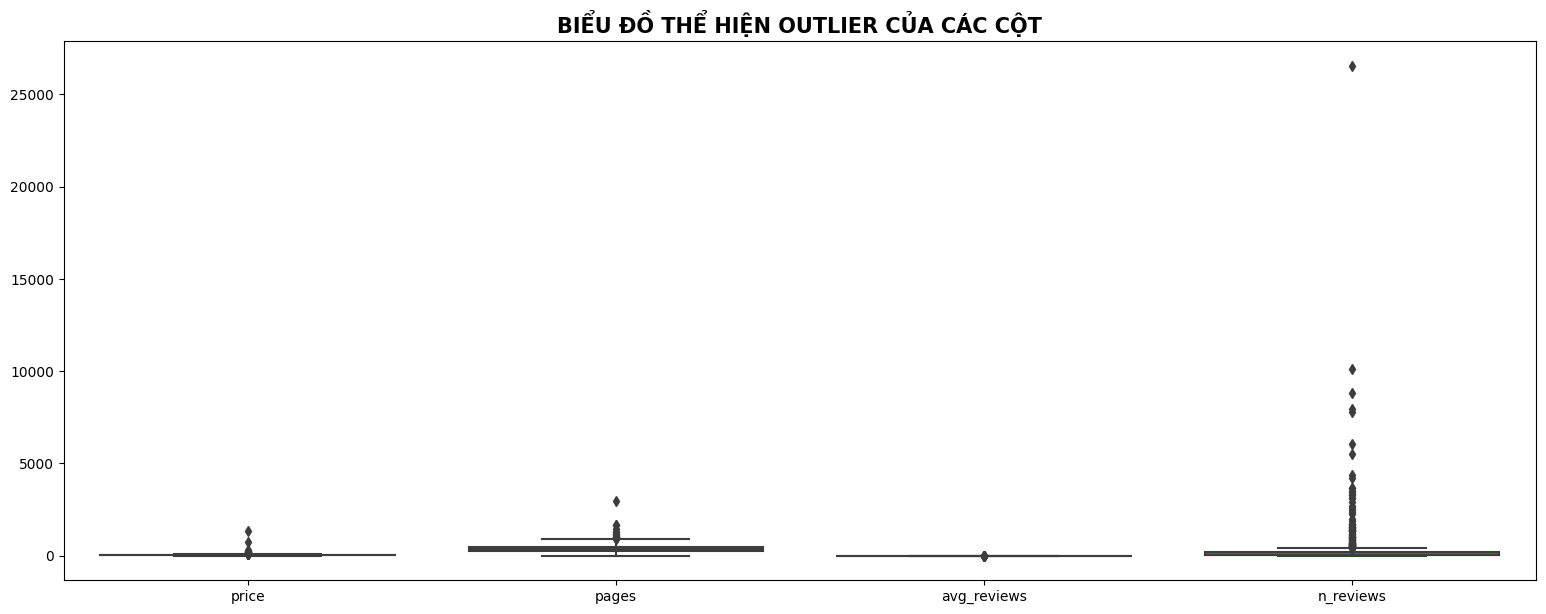

In [ ]:
non_numerical_cols = list(df.dtypes[df.dtypes==object].index)
numerical_data = df.drop(non_numerical_cols, axis=1)
plt.subplots(figsize = (19,7))
sns.boxplot(data=numerical_data)
plt.title('BIỂU ĐỒ THỂ HIỆN OUTLIER CỦA CÁC CỘT', fontsize=15, fontweight='bold')
plt.show()

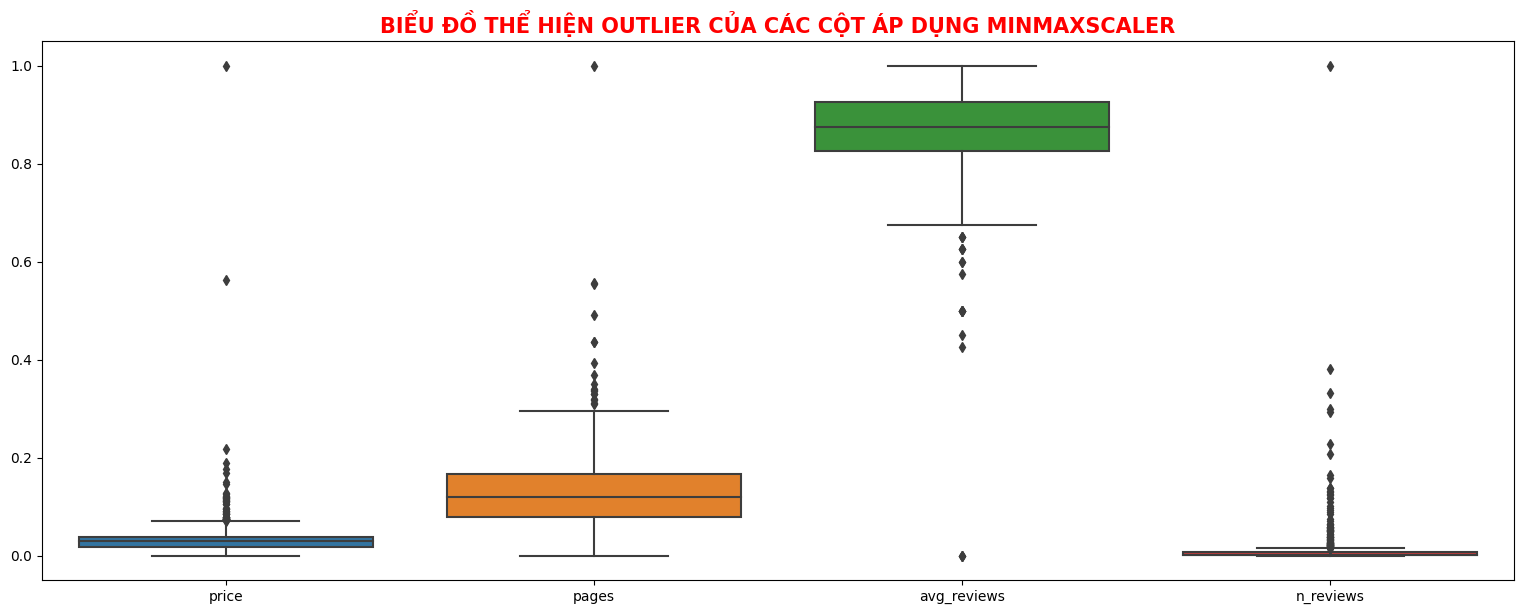

In [ ]:
scaler = MinMaxScaler()
numerical_data = df[df.columns[df.dtypes != 'object']]
sa = scaler.fit_transform(numerical_data)
sd = pd.DataFrame(sa,columns=numerical_data.columns)
plt.subplots(figsize = (19,7))
sns.boxplot(data = sd)
plt.title('BIỂU ĐỒ THỂ HIỆN OUTLIER CỦA CÁC CỘT ÁP DỤNG MINMAXSCALER',fontsize=15,color = 'red',fontweight='bold')
plt.show()

## 3. Phân tích và biểu diễn trực quan các thuộc tính sử dụng trong báo cáo của bộ dữ liệu sau tiền xử lý

# **Chương 4:**


## 1. Phân cụm dữ liệu

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [ ]:
df

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,Deep Learning: Engage the World Change the World,"[ Michael Fullan, Joanne Quinn, et al.]",5.33,8.55 - 35.33,208,4.5,74,72%,14%,7%,2%,4%,7 x 0.47 x 10 inches,15.5 ounces,English,"Corwin; First edition (December 15, 2017)",59,/Deep-Learning-Engage-World-Change/dp/15063685...,https://www.amazon.com/Deep-Learning-Engage-Wo...
826,Machine Learning in Finance: From Theory to Pr...,"[ Matthew F. Dixon, Igor Halperin, et al.]",55.18,52.41 - 55.18,573,4.5,93,78%,7%,7%,4%,4%,6.14 x 1.25 x 9.21 inches,2.25 pounds,English,"Springer; 1st ed. 2020 edition (July 2, 2020)",,/Machine-Learning-Finance-Theory-Practice/dp/3...,https://www.amazon.com/Machine-Learning-Financ...
827,Practical Deep Learning at Scale with MLflow: ...,"[ Yong Liu, and , Dr. Matei Zaharia]",44.99,44.99,288,4.8,8,83%,17%,NaN,NaN,NaN,7.5 x 0.65 x 9.25 inches,1.1 pounds,English,"Packt Publishing (July 8, 2022)",978-1803241333,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
828,Clinical Biostatistics and Epidemiology Made R...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/Clinical-Biostatistics-Epidemiology-Ridiculou...,https://www.amazon.com/Clinical-Biostatistics-...


In [ ]:
X = df[['price', 'pages']].dropna().values

ValueError: ignored

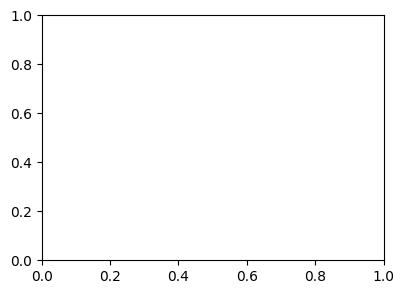

In [ ]:
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans, vq
import random
random.seed(42)

def kmeans_display(X, labels, k):
    color = list(mcolors.XKCD_COLORS.keys())
    plt.title(f'K = {k}', fontsize=10)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='deep', legend=False)
    centroids = k_means.cluster_centers_
    plt.plot(centroids[:, 0], centroids[:, 1], 'sr', markersize=8 )

fig = plt.figure(figsize=(15, 7))
rows, cols = 2, 3
for k in range(2, rows * cols + 2):
    fig.add_subplot(rows, cols, k-1)
    k_means = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X)
    pred_label = k_means.predict(X)
    kmeans_display(X, pred_label, k)
    fig.tight_layout()
fig.savefig('kmeans.pdf', bbox_inches='tight')

In [ ]:
# from sklearn.cluster import KMeans
# random.seed(42)
# fig = plt.figure(figsize=(10, 7))
# rows, cols = 2, 2

# for k in range(2, rows * cols + 2):
#     fig.add_subplot(rows, cols, k-1)
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X)
#     print('Centers found by scikit-learn:')
#     print(kmeans.cluster_centers_)
#     pred_label = kmeans.predict(X)
#     kmeans_display(X, pred_label, k)
# fig.savefig('kmeans.pdf', bbox_inches='tight')

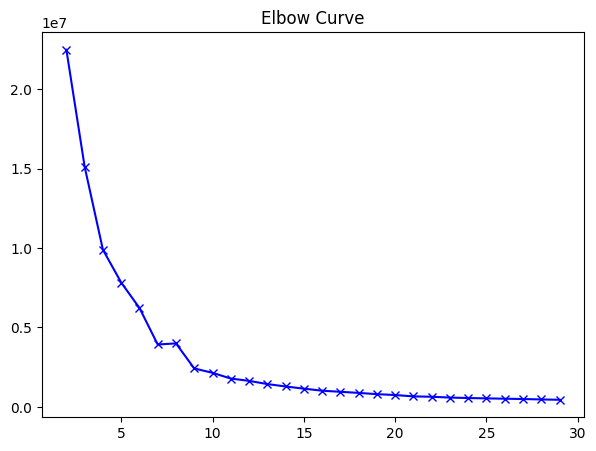

In [ ]:
# X = data
distortions = []
for k in range(2, 30):
    k_means = KMeans(n_clusters=k, random_state=42, n_init='auto')
    k_means.fit(X)
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(7, 5))
plt.plot(range(2, 30), distortions, 'bx-')
plt.title("Elbow Curve")
plt.savefig("elbow_curve.pdf", bbox_inches='tight')

In [ ]:
a = df[['price', 'n_reviews']].dropna()
a.idxmax()

price        734
n_reviews    138
dtype: int64

In [ ]:
a.idxmax()

price        734
n_reviews    138
dtype: int64

In [ ]:
a.drop(677, inplace=True)
a.drop(22, inplace=True)

In [ ]:
X = a.values

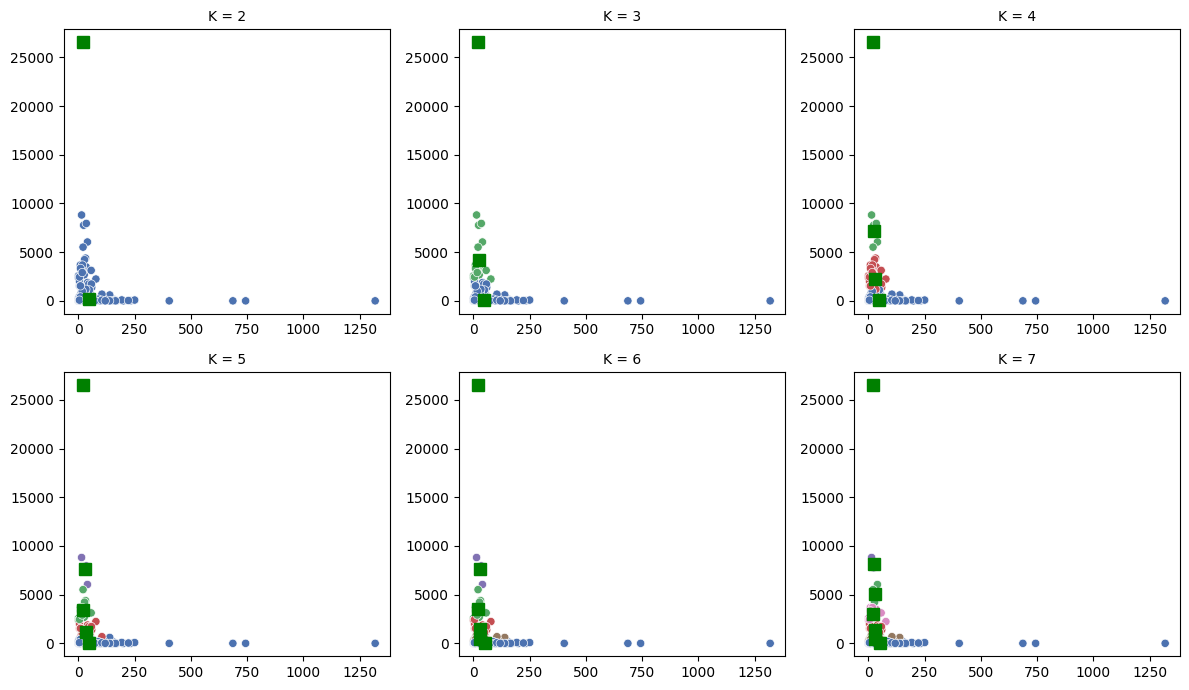

In [ ]:
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans, vq
random.seed(42)

def kmeans_display(X, labels, k):
    color = list(mcolors.XKCD_COLORS.keys())
    plt.title(f'K = {k}', fontsize=10)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='deep', legend=False)
    centroids = k_means.cluster_centers_
    plt.plot(centroids[:, 0], centroids[:, 1], 'sg', markersize=8 )

fig = plt.figure(figsize=(12, 7))
rows, cols = 2, 3
for k in range(2, rows * cols + 2):
    fig.add_subplot(rows, cols, k-1)
    k_means = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X)
    pred_label = k_means.predict(X)
    kmeans_display(X, pred_label, k)
    fig.tight_layout()
fig.savefig('kmeans_remove_outliers.pdf', bbox_inches='tight')

## 2. Phân lớp dữ liệu

## 3. Dự báo từ kết quả phân lớp dữ liệu đạt được.